In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
df=pd.read_csv('/kaggle/input/the-boston-houseprice-data/boston.csv')

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df=scaler.fit_transform(df)
df=pd.DataFrame(df)
x=df.iloc[: ,:-1]
y=df.iloc[: ,-1]

In [6]:
x.shape

(506, 13)

In [7]:
y.shape

(506,)

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15 ,random_state=66)

In [9]:
from keras.models import Sequential
from keras.layers import Dense

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 33)                462       
                                                                 
 dense_1 (Dense)             (None, 16)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,023
Trainable params: 1,023
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
15/15 [==============================] - 1s 19ms/step - loss: 0.0534 - mae: 0.1711 - val_loss: 0.0324 - val_mae: 0.1237
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0296 - mae: 0.1280 - val_loss: 0.0218 - val_mae: 0.1064
Epoch 3/100
15/15 [==============================] - 0s

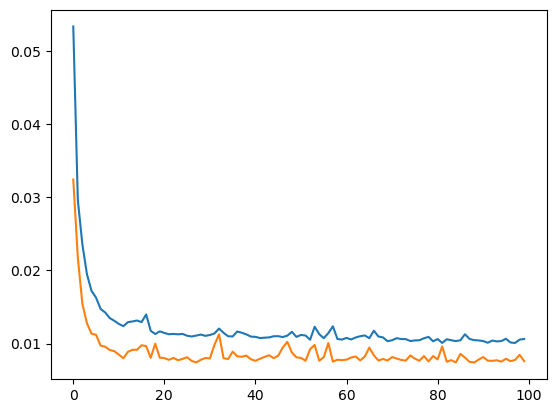

In [10]:
model =Sequential()
model.add(Dense(33 ,activation='tanh' ,input_dim=13))
model.add(Dense(16))
model.add(Dense(1))         
model.summary()
model.compile(loss='mse' ,optimizer='Adam' ,metrics='mae')
results=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),batch_size=30)
import matplotlib.pyplot as plt
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score 
acc=r2_score(y_test , y_pred) 
print('r2_score_tanh= ',acc)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 40)                560       
                                                                 
 dense_4 (Dense)             (None, 1)                 41        
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
15/15 [==============================] - 1s 17ms/step - loss: 0.0414 - mae: 0.1467 - val_loss: 0.0258 - val_mae: 0.1125
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0261 - mae: 0.1125 - val_loss: 0.0186 - val_mae: 0.0974
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0210 - mae: 0.1046 - val_loss: 0.0158 - val_mae: 0.0941
Epoch 4/100
15/15 [==============================] - 0s 4m

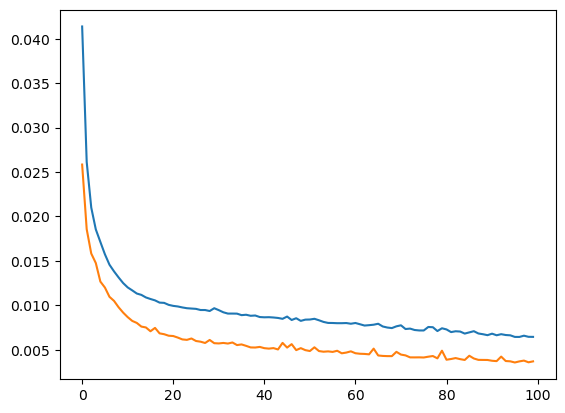

In [11]:
model =Sequential()
model.add(Dense(40 ,activation='relu' ,input_dim=13))   
model.add(Dense(1))
model.summary()
model.compile(loss='mse' ,optimizer='Adam' ,metrics='mae')
results=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),batch_size=30)
import matplotlib.pyplot as plt
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score 
NN=r2_score(y_test , y_pred) 
print('r2_score_relu= ',NN)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


model_lr =LinearRegression()
model_lr.fit(x_train , y_train)
y_pred=model_lr.predict(x_test)


LR=r2_score(y_test , y_pred)
print('accuracy_score= ',LR)

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test ,y_pred)
print('mse =' ,mse)

accuracy_score=  0.7957679870192947
mse = 0.008606815181776202


In [13]:
from sklearn.svm import SVR
model_svr = SVR(kernel='poly').fit(x_train, y_train)
y_pred= model_svr.predict(x_test)
svr=r2_score(y_test, y_pred)
print("SVR Score = ",svr)

SVR Score =  0.8902297616540253


In [14]:
from sklearn import tree
model_dt =tree.DecisionTreeRegressor()
model_dt.fit(x_train , y_train)
y_pred=model_dt.predict(x_test)

dt=r2_score(y_test, y_pred)
print("DT Score = ",dt)


DT Score =  0.8113374333615573


In [15]:
from sklearn.ensemble import RandomForestRegressor
model_rf =RandomForestRegressor()
model_rf.fit(x_train , y_train)
y_pred=model_rf.predict(x_test)

RF=r2_score(y_test, y_pred)
print("DT Score = ",RF)

DT Score =  0.9199787503889119


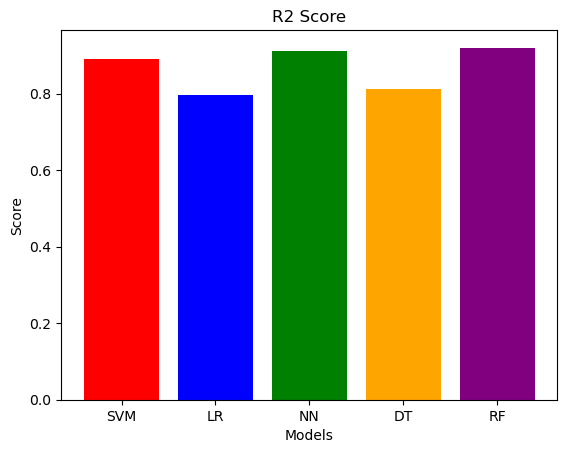

In [16]:
#ploting bar
x=['SVM','LR','NN','DT','RF']
y=[svr, LR , NN , dt , RF]
colors = ['red', 'blue', 'green', 'orange', 'purple']
plt.bar(x, y,color=colors)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('R2 Score')
plt.show()

In [17]:
for i in range(0,len(y)):
    print("Score of "+x[i]+" = ",y[i])

Score of SVM =  0.8902297616540253
Score of LR =  0.7957679870192947
Score of NN =  0.9125592904871489
Score of DT =  0.8113374333615573
Score of RF =  0.9199787503889119
